# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys2 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy


# Output File (CSV)
output_data_file = "APIHW\Resources\output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

553de44a9b004ceed716efc634615c4f


In [2]:
units = "imperial"

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
testresponse =   requests.get(query_url+'chicago').json()
print(testresponse)

{'coord': {'lon': -87.65, 'lat': 41.85}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 31.53, 'feels_like': 20.26, 'temp_min': 30.99, 'temp_max': 32, 'pressure': 1013, 'humidity': 86}, 'visibility': 1609, 'wind': {'speed': 12.66, 'deg': 40}, 'snow': {'1h': 0.71}, 'clouds': {'all': 90}, 'dt': 1612116823, 'sys': {'type': 1, 'id': 4861, 'country': 'US', 'sunrise': 1612098228, 'sunset': 1612134256}, 'timezone': -21600, 'id': 4887398, 'name': 'Chicago', 'cod': 200}


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Define base URL and unit temperatiure 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create an empty list to hold the value of the all the data that we will extract from the API
weather_check = []

# Set the record counter and set counter to 1
record_counter = 1
set_counter = 1

# This will print the beginning of the data retrieval
print("Beginning Data Retrieval")
print("------------------------------")

# for each city in the cities list
for city in cities:
    
    # write query URL
    query_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
   
   
    # Jsonify the data
    weather_response = requests.get(query_url+city).json()
       
    
    # Try to grab the weather data if they are available in the API
    try:
        cityName = weather_response["name"]
        lat = weather_response["coord"]["lat"]
        lng = weather_response["coord"]["lon"]
        maxTemp = weather_response["main"]["temp_max"]    
        humidity = weather_response["main"]["humidity"]     
        cloudiness = weather_response["clouds"]["all"] 
        windSpeed = weather_response["wind"]["speed"] 
        country = weather_response["sys"]["country"]     
        date = weather_response["dt"]        
        
        # Append the collected data in the empty list
        weather_check.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        
        
        if record_counter > 50:
            set_counter += 1
            record_counter = 1
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        record_counter += 1
        
    # Handle exceptions for a data that is not available in the API    
    except:
        print("City not found. Skipping...")
 

#Print at the end of Data Retrieval
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | sri aman
Processing Record 2 of Set 1 | semnan
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 4 of Set 1 | albany
City not found. Skipping...
Processing Record 5 of Set 1 | nara
Processing Record 6 of Set 1 | stege
Processing Record 7 of Set 1 | maimbung
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | teahupoo
Processing Record 11 of Set 1 | gamba
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rikitea
City not found. Skipping...
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | bay roberts
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | hamilton
City not found. Skipping...
Processing Record 20 of Set 1 | santa is

Processing Record 40 of Set 4 | mitsamiouli
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | mehamn
Processing Record 44 of Set 4 | candelaria
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | sangar
Processing Record 49 of Set 4 | sambava
Processing Record 50 of Set 4 | thinadhoo
Processing Record 1 of Set 5 | kigoma
Processing Record 2 of Set 5 | melo
Processing Record 3 of Set 5 | itarantim
Processing Record 4 of Set 5 | ambilobe
Processing Record 5 of Set 5 | santa maria
Processing Record 6 of Set 5 | la libertad
Processing Record 7 of Set 5 | milkovo
Processing Record 8 of Set 5 | dicabisagan
Processing Record 9 of Set 5 | varel
Processing Record 10 of Set 5 | coihaique
Processing Record 11 of Set 5 | tilichiki
Processing Record 12 of Set 5 | mareeba
Processing Record 13 of Set 5 | bhatkal
Processing Record 14 of Set

Processing Record 28 of Set 8 | abonnema
Processing Record 29 of Set 8 | ledyard
Processing Record 30 of Set 8 | vienne
Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | byron bay
City not found. Skipping...
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | west fargo
Processing Record 35 of Set 8 | daru
Processing Record 36 of Set 8 | mikhaylovka
Processing Record 37 of Set 8 | college
Processing Record 38 of Set 8 | calama
Processing Record 39 of Set 8 | burnie
Processing Record 40 of Set 8 | sovetskiy
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | riohacha
Processing Record 43 of Set 8 | havre-saint-pierre
Processing Record 44 of Set 8 | iqaluit
Processing Record 45 of Set 8 | chiredzi
Processing Record 46 of Set 8 | abnub
Processing Record 47 of Set 8 | nioro
Processing Record 48 of Set 8 | setermoen
Processing Record 49 of Set 8 | terrace
Processing Record 50 of Set 8 | bambanglipuro
Processing Record 1 of Set 9

In [5]:
print(weather_check["humidity"])

TypeError: list indices must be integers or slices, not str

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a DataFrame
city_data_df = pd.DataFrame(weather_check)
city_data_df.count()

City          524
Lat           524
Lng           524
Max Temp      524
Humidity      524
Cloudiness    524
Wind Speed    524
Country       524
Date          524
dtype: int64

In [7]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sri Aman,1.2376,111.4621,298.15,94,100,0.63,MY,1612117510
1,Semnan,35.5729,53.3971,279.50,54,100,1.31,IR,1612117214
2,Ushuaia,-54.8000,-68.3000,285.15,58,75,1.54,AR,1612117452
3,Albany,42.6001,-73.9662,264.82,52,100,1.53,US,1612117477
4,Nara,34.6851,135.8049,275.93,68,0,1.08,JP,1612117511
...,...,...,...,...,...,...,...,...,...
519,Zaria,11.1113,7.7227,299.37,17,15,4.62,NG,1612117642
520,Maykop,44.6078,40.1058,279.47,81,97,1.76,RU,1612117642
521,Tessalit,20.1986,1.0114,295.40,16,56,4.32,ML,1612117642
522,Shchors,51.8186,31.9450,265.73,96,27,4.14,UA,1612117643


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Display the descriptive statistics
city_data_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,5.240000e+02
mean,21.684327,20.877824,282.335153,73.085878,55.398855,3.833817,1.612118e+09
std,33.974038,90.788188,19.902492,19.749538,38.708195,2.741693,9.810897e+01
min,-54.800000,-179.166700,227.900000,8.000000,0.000000,0.110000,1.612117e+09
25%,-7.093975,-56.026425,269.462500,64.000000,18.000000,1.930000,1.612118e+09
50%,26.878850,22.453050,289.345000,78.000000,72.000000,3.090000,1.612118e+09
75%,52.654000,102.331025,298.150000,87.000000,91.250000,5.150000,1.612118e+09
max,78.218600,179.316700,310.590000,100.000000,100.000000,18.380000,1.612118e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
over100_humidity = city_data_df.loc[city_data_df["Humidity"] > 100]
over100_humidity_index = over100_humidity.index
over100_humidity_index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(labels = over100_humidity_index, inplace = False)

clean_city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sri Aman,1.2376,111.4621,298.15,94,100,0.63,MY,1612117510
1,Semnan,35.5729,53.3971,279.50,54,100,1.31,IR,1612117214
2,Ushuaia,-54.8000,-68.3000,285.15,58,75,1.54,AR,1612117452
3,Albany,42.6001,-73.9662,264.82,52,100,1.53,US,1612117477
4,Nara,34.6851,135.8049,275.93,68,0,1.08,JP,1612117511
...,...,...,...,...,...,...,...,...,...
519,Zaria,11.1113,7.7227,299.37,17,15,4.62,NG,1612117642
520,Maykop,44.6078,40.1058,279.47,81,97,1.76,RU,1612117642
521,Tessalit,20.1986,1.0114,295.40,16,56,4.32,ML,1612117642
522,Shchors,51.8186,31.9450,265.73,96,27,4.14,UA,1612117643


In [13]:
# # Extract relevant fields from the data frame
latitude = clean_city_data_df["Lat"]
longitude = clean_city_data_df["Lng"]
temperature = clean_city_data_df["Max Temp"]
humidity = clean_city_data_df["Humidity"]
cloudiness = clean_city_data_df["Cloudiness"]
wind_speed = clean_city_data_df["Wind Speed"]

clean_city_data_df.reset_index()
clean_city_data_df.index.name = "City_ID"

# Export the City_Data into a csv

output_data_file = (r'C:\Users\chber\Desktop\APIHW\Resources\output_data_cities.csv')

output_data = clean_city_data_df.to_csv(output_data_file)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

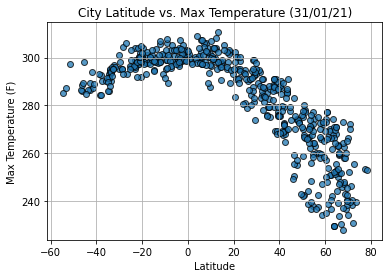

In [14]:
# Set the current date
today_date = pd.to_datetime("today")
today_date = today_date.strftime("%d/%m/%y")

# Plot the scatter plot
plt.scatter(latitude, temperature, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\lat_temp.png')

## Latitude vs. Humidity Plot

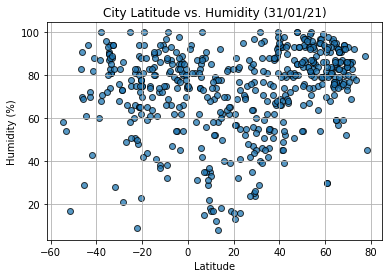

In [15]:
# Plot the scatter plot
plt.scatter(latitude, humidity, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\lat_humidity.png')

## Latitude vs. Cloudiness Plot

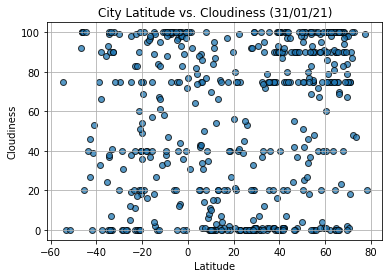

In [16]:
plt.scatter(latitude, cloudiness, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\cloudiness.png')

## Latitude vs. Wind Speed Plot

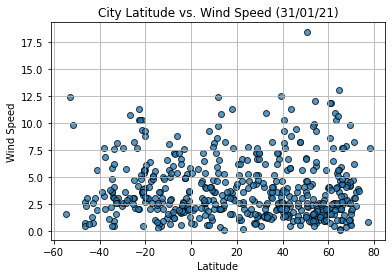

In [17]:
plt.scatter(latitude, wind_speed, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\lat_windspeed.png')

## Linear Regression

In [18]:

#Create a function to create Linear Regression plots

def linearRegression(x_value, y_value, x_annotation, y_annotation):
 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue** 2}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value,y_value, marker="o", edgecolors = "black", alpha = 0.75)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_annotation, y_annotation),fontsize = 20, color="red")

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = []
southern_hemisphere = []


for city in cities:
    query_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:

        if response["coord"]["lat"] >= 0:

            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            northern_hemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        else:
            
            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            southern_hemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
           
    except:
        
        print("City not found. Skipping...")
        
#Print at the end of Data Retrieval
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [20]:
# Create northern hemisphere DataFrame
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)
northern_hemisphere_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sri Aman,1.2376,111.4621,77.00,94,100,1.45,MY,1612118305
1,Semnan,35.5729,53.3971,42.87,55,89,2.42,IR,1612118305
2,Albany,42.6001,-73.9662,19.00,50,100,2.93,US,1612118114
3,Nara,34.6851,135.8049,37.00,68,0,2.66,JP,1612118306
4,Stege,54.9870,12.2846,34.00,10,0,12.48,DK,1612118306


In [21]:
# Create southern hemisphere DataFrame
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)
southern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,58,75,3.44,AR,1612118306
1,Teahupoo,-17.8333,-149.2667,82.40,61,40,8.05,PF,1612118307
2,Gamba,-2.6500,10.0000,78.85,86,100,3.69,GA,1612118307
3,Mataura,-46.1927,168.8643,55.83,76,87,1.77,NZ,1612118307
4,Rikitea,-23.1203,-134.9692,78.80,65,1,9.95,PF,1612118307


In [22]:

# Save the data in the Output folder
northern_hemisphere_data = northern_hemisphere_df.to_csv(r'C:\Users\chber\Desktop\APIHW\Resources\northern_hemisphere_data.csv')

# Save the data to the output folder
southern_hemisphere_data = southern_hemisphere_df.to_csv(r'C:\Users\chber\Desktop\APIHW\Resources\southern_hemisphere_data.csv')



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7531267403536435


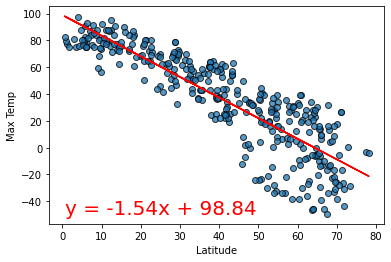

In [23]:
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], northern_hemisphere_df["Lat"].min(), northern_hemisphere_df["Max Temp"].min())  
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_north_lat_temp.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4700757130511282


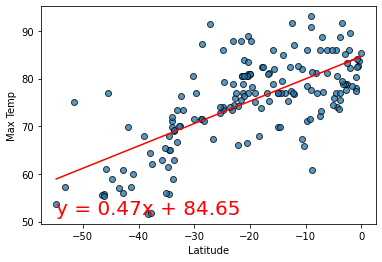

In [24]:
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], southern_hemisphere_df["Lat"].min(), southern_hemisphere_df["Max Temp"].min())
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\south_lat_temp.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1748519745301827


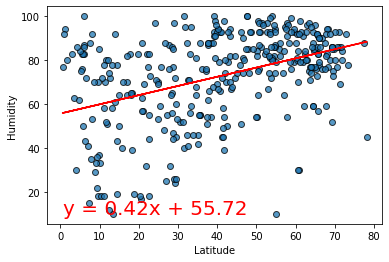

In [25]:
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], northern_hemisphere_df["Lat"].min(), northern_hemisphere_df["Humidity"].min())  
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_north_lat_humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007605011292771643


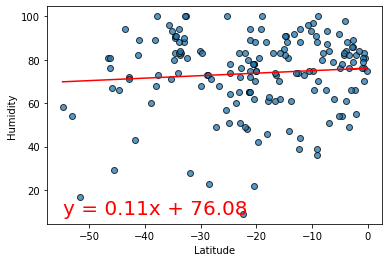

In [26]:
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], southern_hemisphere_df["Lat"].min(), southern_hemisphere_df["Humidity"].min())
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_south_lat_humidity.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11538695520538515


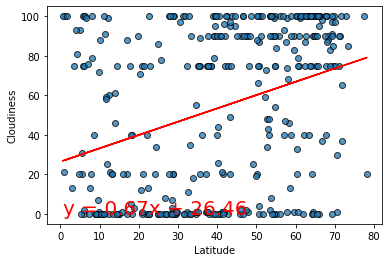

In [27]:
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], northern_hemisphere_df["Lat"].min(), northern_hemisphere_df["Cloudiness"].min())  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_north_lat_cloudiness.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.034575979614801654


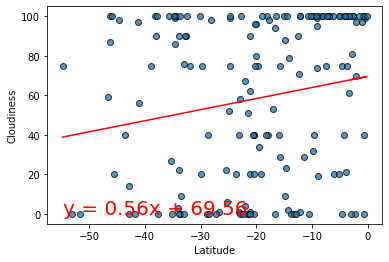

In [28]:
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], southern_hemisphere_df["Lat"].min(), southern_hemisphere_df["Cloudiness"].min())
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_south_lat_cloudiness.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00010003007582597866


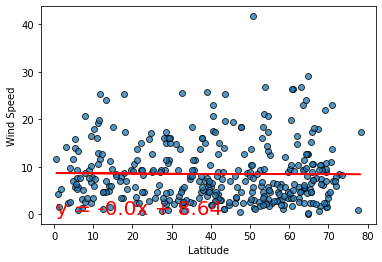

In [30]:
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], northern_hemisphere_df["Lat"].min(), northern_hemisphere_df["Wind Speed"].min())  
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_north_lat_windspeed.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003479758127571284


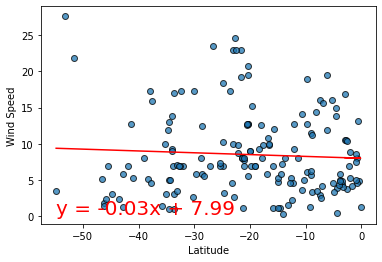

In [31]:
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], southern_hemisphere_df["Lat"].min(), southern_hemisphere_df["Wind Speed"].min())
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig(r'C:\Users\chber\Desktop\APIHW\Resources\Output\linreg_south_lat_windspeed.png')

plt.show()